# Ejercicio Final de Data Science: Predicción de Precios de Casas

Objetivo: Construir un modelo de Machine Learning para predecir si una casa esta siendo vendida al precio correcto, basado en los atributos de la vivienda. Utilizaremos un RandomForestRegressor

Dataset: USA Housing Dataset. Disponible en Kaggle

Pasos:
1. Introduccion y Objetivo: Definir el problema y el objetivo
2. Importar Librerrias: Cargar las herramientas necesarias
3. Carga de Datos: Leer el dataset
4. Analisis exploratorio de datos
5. Construcción y Entrenamiendo del Modelo
6. Evaluación del Modelo

# 1. Introducción y Objetivo

El objetivo es predecir el precio de la casa, basandonos en los atributos de la misma

# 2. Importar Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 3. Carga de datos

In [2]:
df = pd.read_csv("USA Housing Dataset.csv")
df = df.iloc[:, 1:]
df['bathrooms'] = df ['bathrooms'].astype(int)
df['floors'] = df ['floors'].astype(int)
df['bedrooms'] = df ['bedrooms'].astype(int)
df['price'] = df ['price'].astype(int)
# Codigo para que no aparezcan los números con notacion cientifica
pd.set_option('display.float_format','{:,.2f}'.format)

In [3]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,376000,3,2,1340,1384,3,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,800000,4,3,3540,159430,2,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2238888,5,6,7270,130017,2,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,324000,3,2,998,904,2,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,549900,5,2,3060,7015,1,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          4140 non-null   int64 
 1   bedrooms       4140 non-null   int64 
 2   bathrooms      4140 non-null   int64 
 3   sqft_living    4140 non-null   int64 
 4   sqft_lot       4140 non-null   int64 
 5   floors         4140 non-null   int64 
 6   waterfront     4140 non-null   int64 
 7   view           4140 non-null   int64 
 8   condition      4140 non-null   int64 
 9   sqft_above     4140 non-null   int64 
 10  sqft_basement  4140 non-null   int64 
 11  yr_built       4140 non-null   int64 
 12  yr_renovated   4140 non-null   int64 
 13  street         4140 non-null   object
 14  city           4140 non-null   object
 15  statezip       4140 non-null   object
 16  country        4140 non-null   object
dtypes: int64(13), object(4)
memory usage: 550.0+ KB


In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,"4,140.00","4,140.00","4,140.00","4,140.00","4,140.00","4,140.00","4,140.00","4,140.00","4,140.00","4,140.00","4,140.00","4,140.00","4,140.00"
mean,"553,062.86",3.40,1.79,"2,143.64","14,697.64",1.46,0.01,0.25,3.45,"1,831.35",312.29,"1,970.81",808.37
std,"583,686.46",0.90,0.75,957.48,"35,876.84",0.55,0.09,0.79,0.68,861.38,464.35,29.81,979.38
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,"1,900.00",0.00
25%,"320,000.00",3.00,1.00,"1,470.00","5,000.00",1.00,0.00,0.00,3.00,"1,190.00",0.00,"1,951.00",0.00
50%,"460,000.00",3.00,2.00,"1,980.00","7,676.00",1.00,0.00,0.00,3.00,"1,600.00",0.00,"1,976.00",0.00
75%,"659,125.00",4.00,2.00,"2,620.00","11,000.00",2.00,0.00,0.00,4.00,"2,310.00",602.50,"1,997.00","1,999.00"
max,"26,590,000.00",8.00,6.00,"10,040.00","1,074,218.00",3.00,1.00,4.00,5.00,"8,020.00","4,820.00","2,014.00","2,014.00"


# 4. Analisis exploratorio de Datos

In [6]:
# Eliminacion de casas con precio y superficie 0
df = df[df['price'] !=0]
df = df[df['sqft_basement'] !=0]

### Deteccion de Outliers

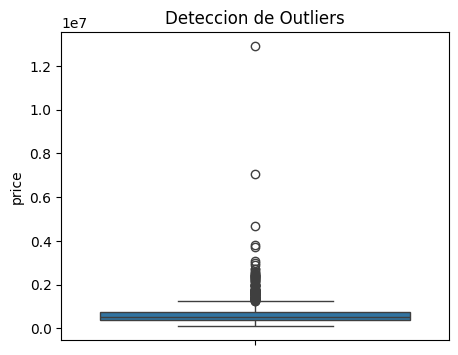

In [7]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, y='price')
plt.title('Deteccion de Outliers')
plt.show()

In [8]:
# Calculo Q1 y Q3
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Defino los limites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtro los outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print ("Outliers detectados:")
print(outliers)

Outliers detectados:
         price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
2      2238888         5          6         7270    130017       2   
22     1575000         5          2         3650     20150       1   
28     1315000         4          3         3460      3997       2   
65     1346400         5          1         3380     20021       1   
121    2555000         4          2         5300     26211       2   
...        ...       ...        ...          ...       ...     ...   
3813   2321000         5          4         5780     17004       2   
3886  12899000         3          2         2190     11394       1   
3887   2110000         4          1         2100      9200       1   
4005   2560498         3          2         1710      1664       2   
4112   1288333         6          4         3830      4800       3   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
2              0     0          3        6420            850    

### Eliminacion de Outliers

In [9]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# 5. Construcción y Entrenamiento del Modelo


In [10]:
# Paso las columnas statezip y city a float, asi lo puedo implementar en el random forest
df = pd.get_dummies(df, columns=['city'], drop_first=True)
df = pd.get_dummies(df, columns=['statezip'], drop_first=True)

División de datos

In [11]:
x = df.drop(['price', 'street', 'country','waterfront', 'sqft_basement'], axis=1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

### Construcción del modelo

In [12]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. Evaluación del Modelo

In [13]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2%}")
print ("MAE", mean_absolute_error(y_test,y_pred))

Mean Squared Error: 19327129228.44
R² Score: 60.80%
MAE 99343.80534201955


# 7. **Conclusiones**

Resumen de Resultados:
- El RMSE del modelo es 19327129228.44
- El r2 score es de 0.60
- El MAE es de 99343.80

El modelo sirve para predecir el valor de una casa, aunque se podria mejorar bastante, se puede utilizar para tener una idea del posible mejor precio